# SPARQL: Fortgeschrittene Themen

In dieser Übung schauen wir uns einige der eher fortgeschrittenen SPARQL Themen etwas im Detail an. Wie bisher, verwenden wir RDF welches unsere Pink Floyd Diskographie beschreibt.

In [1]:
!pip install rdflib

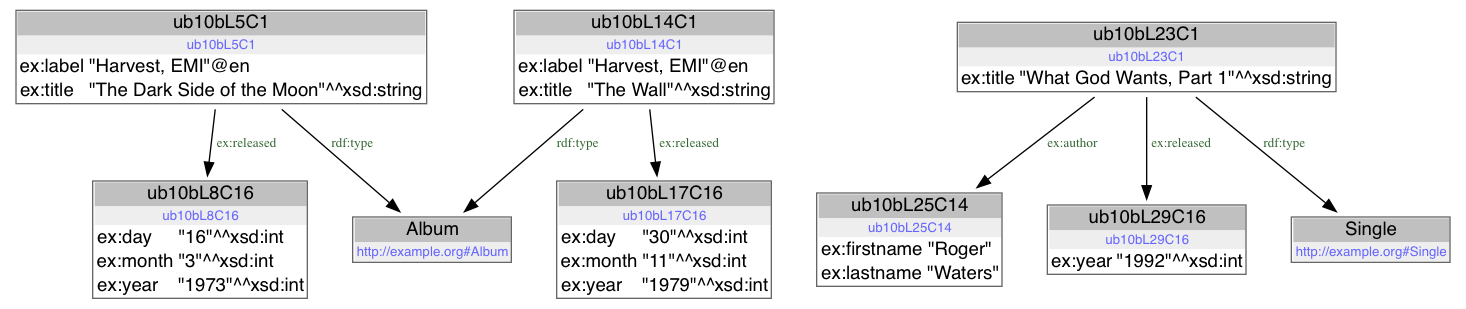

In [34]:
import io
import pydot
from rdflib import Graph, URIRef, Namespace, Literal
from rdflib.namespace import RDF, XSD
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from shortid import ShortId
import pandas as pd
from io import BytesIO
from io import StringIO
from rdflib import Graph
from rdflib.plugins.sparql.results.csvresults import CSVResultSerializer
from IPython.display import display

rdf = """
@prefix ex: <http://example.org#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

[] a ex:Album ;
   ex:title "The Dark Side of the Moon"^^xsd:string ;
   ex:label "Harvest, EMI"@en ;
   ex:released [ 
     ex:day "16"^^xsd:int ;
     ex:month "03"^^xsd:int ;
     ex:year "1973"^^xsd:int 
   ] .
   
[] a ex:Album ;
   ex:title "The Wall"^^xsd:string ;
   ex:label "Harvest, EMI"@en ;
   ex:released [ 
     ex:day "30"^^xsd:int ;
     ex:month "11"^^xsd:int ;
     ex:year "1979"^^xsd:int 
   ] .

[] a ex:Single ;
   ex:title "What God Wants, Part 1"^^xsd:string ;
   ex:author [
     ex:firstname "Roger" ;
     ex:lastname "Waters"
   ] ;
   ex:released [ 
     ex:year "1992"^^xsd:int 
   ] .
"""

g = Graph()

r = g.parse(data=rdf, format='turtle')

def query(q):
    serializer = CSVResultSerializer(g.query(q))
    output = BytesIO()
    serializer.serialize(output)
    display(pd.read_csv(StringIO(output.getvalue().decode())))

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream)
    (dg,) = pydot.graph_from_dot_data(stream.getvalue())
    display(Image(dg.create_png()))
    
visualize(g)

@prefix ex: <http://example.org#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xml: <http://www.w3.org/XML/1998/namespace> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

[] ex:band "Pink Floyd" ;
    ex:title "The Wall"^^xsd:string .

[] ex:band "Pink Floyd" ;
    ex:title "The Dark Side of the Moon"^^xsd:string .




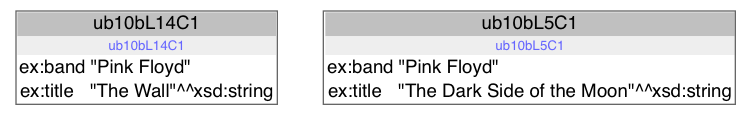

In [36]:
q = """
PREFIX ex: <http://example.org#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

CONSTRUCT {
  ?album ex:band "Pink Floyd" .
  ?album ex:title ?title .
} WHERE {
  ?album rdf:type ex:Album .
  ?album ex:title ?title .
  FILTER (?title = "The Dark Side of the Moon"^^xsd:string || ?title = "The Wall")
}
"""

qr = g.query(q)

gr = Graph()
gr.bind('ex', 'http://example.org#')

for row in qr:
    gr.add(row)

print(gr.serialize(format='turtle').decode('utf-8'))
visualize(gr)    

# Erklären Sie die CONSTRUCT Abfrage: Mit '?album ex:band "Pink Floyd" .' wird ein neues tripel eingefügt. Das '?album ex:title ?title .' Tripel im construct ist im rdf Dokument schon vorhanden. Beide Tripels sind zusammen ein template. 
# Erklären Sie das Resultat: Die Variable ?album spricht sowohl dark side of the moon als auch the wall an(da beide ex:Album). Deshalb tauchen auch nur die beiden in der Ergebnismenge auf. Durch das im Construct vorgegebene ex:band werden beide angesprochenen ex:album um das statement ex:band "pink floyd" erweitert.  

In [53]:
q = """
PREFIX ex: <http://example.org#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 

ASK {
  ?single rdf:type ex:Single .
}
"""

qr = g.query(q)

for row in qr:
    print(row)
    
# Erklären Sie die ASK Abfrage: mit ask wird ein statement abgefragt. Ist dieses statement im rdf dokument vorhanden ergibt die aussage true, ansosnten false.
# Warum ist das Resultat 'True': Da das Tripel aus der ask abfrage eine Ergebnismenge liefert. 

True


In [55]:
q = """
PREFIX ex: <http://example.org#> 

ASK {
  [] ex:author [
     ex:lastname "Waters"
  ]
}
"""

qr = g.query(q)

for row in qr:
    print(row)
    
# Erklären Sie die ASK Abfrage: da in der ask abfrage keine variable auftaucht, soll exakt diese struktur im rdf dokument zu finden sein. Wenn nicht ergibt das resultat false.
# Warum ist das Resultat 'False': Da es nur 'ex:lastname "Waters"' statt ex:lastname "Water" gibt.

True


In [6]:
q = """
PREFIX ex: <http://example.org#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?title 
WHERE { 
  [] ex:title ?title ;
     ex:released [ ex:year ?year ]
}
ORDER BY (?year)
"""

query(q)

# Erklären Sie die Abfrage: mit select variable ?title werden nur die titel im rdf dokument selektiert, welche mit der where bedingung eingeschränkt werden. 
# In welcher Reihenfolge werden die Resultate angezeigt? Antwort:  da im order by kein desc geschrieben steht wird automatisch ein asc interpretiert, was zur aufsteigenden Sortierung der ergebnisse führt. 

,title
0,The Dark Side of the Moon
1,The Wall
2,"What God Wants, Part 1"


In [7]:
q = """
PREFIX ex: <http://example.org#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?title 
WHERE { 
  [] ex:title ?title ;
     ex:released [ ex:year ?year ]
}
ORDER BY DESC(?year)
"""

query(q)

# Inwiefern ist dieses Resultat anders als das letzte? Antwort:  mit order by "desc" wird eine absteigende Sortierung ermöglicht

,title
0,"What God Wants, Part 1"
1,The Wall
2,The Dark Side of the Moon


In [8]:
q = """
PREFIX ex: <http://example.org#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?title ?year
WHERE { 
  [] ex:title ?title ;
     ex:released [ ex:year ?year ]
}
ORDER BY DESC(?year) LIMIT 1 OFFSET 0
"""

query(q)

q = """
PREFIX ex: <http://example.org#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?title ?year
WHERE { 
  [] ex:title ?title ;
     ex:released [ ex:year ?year ]
}
ORDER BY DESC(?year) LIMIT 1 OFFSET 1
"""

query(q)

q = """
PREFIX ex: <http://example.org#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?title ?year
WHERE { 
  [] ex:title ?title ;
     ex:released [ ex:year ?year ]
}
ORDER BY DESC(?year) LIMIT 1 OFFSET 2
"""

query(q)

# Wieviele Abfragen gibt es hier? Antwort: 3
# Erklären Sie das Resultat, insbesondere auch die jeweilige Anzahl Resultate: mit limit wird die reultatsmenge eingeschränkt, hier auf 1. mit offset werden resultate in der ergebnismenge übersprungen.  

,title,year
0,"What God Wants, Part 1",1992


,title,year
0,The Wall,1979


,title,year
0,The Dark Side of the Moon,1973


Ähnlich wie in der Vorlesung für DBpedia gezeigt, stellen wir als nächstes einige Abfragen an den SPARQL Endpoint [http://dblp.l3s.de/d2r/snorql/](http://dblp.l3s.de/d2r/snorql/). Dieser liefert bibliographische Information der [dblp](https://dblp.uni-trier.de/) (Digital Bibliography & Library Project) und ist vom [Forschungszentrum L3S](https://www.l3s.de/de/home) betrieben.

In [11]:
#!pip install SPARQLWrapper

import pandas as pd
from io import StringIO
from SPARQLWrapper import SPARQLWrapper, JSON

pd.set_option('display.max_colwidth', 200)

prefixes = """
PREFIX swrc: <http://swrc.ontoware.org/ontology#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX d2r: <http://sites.wiwiss.fu-berlin.de/suhl/bizer/d2r-server/config.rdf#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX map: <file:///home/diederich/d2r-server-0.3.2/dblp-mapping.n3#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
"""

def query(endpoint, sparql):
    sw = SPARQLWrapper(endpoint)
    sw.setQuery('{}{}'.format(prefixes, sparql))
    sw.setReturnFormat(JSON)
    json = sw.query().convert()
    variables = json['head']['vars']
    bindings = json['results']['bindings']
    data = {}
    for variable in variables:
        values = []
        for binding in bindings:
            values.append(binding[variable]['value'])
        data[variable] = values
    df = pd.DataFrame(data=data)
    display(df)

In [12]:
query('http://dblp.l3s.de/d2r/sparql', """
SELECT ?title ?issued ?url
WHERE {
  [] dc:creator [ rdfs:label "Bijan Parsia" ] ;
     dc:title ?title ;
     dcterms:issued ?issued ;
     foaf:homepage ?url
}
ORDER BY DESC(?issued)
LIMIT 10
""")

# Erklären Sie was hier geschieht: aus dem rdf dokument werden die titel, issued und url selektiert, welche durch die where klausel eingeschränkt werden. das ganze wird absteigend sortiert, wobei hier nach issued geordnet wird. Es werden mit limit 10 nur die ersten zehn ergebnisse angezeigt. 

,issued,title,url
0,2018,OWL Reasoning: Subsumption Test Hardness and Modularity.,http://dx.doi.org/doi.org%2F10.1007%2Fs10817-017-9414-8
1,2018,OWL Reasoning: Subsumption Test Hardness and Modularity.,https://doi.org/10.1007/s10817-017-9414-8
2,2017,Using Semantic Web Technologies to Underpin the SNOMED CT Query Language.,http://dx.doi.org/doi.org%2F10.1007%2F978-3-319-71078-5%5F20
3,2017,The OWL Reasoner Evaluation (ORE) 2015 Competition Report.,http://dx.doi.org/doi.org%2F10.1007%2Fs10817-017-9406-8
4,2017,Using Semantic Web Technologies to Underpin the SNOMED CT Query Language.,https://doi.org/10.1007/978-3-319-71078-5_20
5,2017,The OWL Reasoner Evaluation (ORE) 2015 Competition Report.,https://doi.org/10.1007/s10817-017-9406-8
6,2016,"Joint Proceedings of the 5th Workshop on Data Mining and Knowledge Discovery meets Linked Open Data and the 1st International Workshop on Completing and Debugging the Semantic Web (Know@LOD-2016, ...",http://ceur-ws.org/Vol-1586
7,2016,The OWL Reasoner Evaluation (ORE) 2015 Resources.,http://dx.doi.org/doi.org%2F10.1007%2F978-3-319-46547-0%5F17
8,2016,An Experimental Evaluation of Automatically Generated Multiple Choice Questions from Ontologies.,http://dx.doi.org/doi.org%2F10.1007%2F978-3-319-54627-8%5F3
9,2016,Ontology-Based Multiple Choice Question Generation.,http://dx.doi.org/doi.org%2F10.1007%2Fs13218-015-0405-9


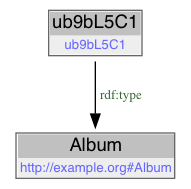

In [26]:
rdf = """
@prefix ex: <http://example.org#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

[] a ex:Album .
"""

g = Graph()

r = g.parse(data=rdf, format='turtle')

visualize(g)